In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
%%time
data = pd.read_csv('Data/NY data features.csv')

Wall time: 41.8 s


In [3]:
data.head()

,FV/LotArea_Zip5,FV/BldArea_Zip5,FV/BldVol_Zip5,AVL/LotArea_Zip5,AVL/BldArea_Zip5,AVL/BldVol_Zip5,AVT/LotArea_Zip5,AVT/BldArea_Zip5,AVT/BldVol_Zip5,FV/LotArea_Zip3,FV/BldArea_Zip3,FV/BldVol_Zip3,AVL/LotArea_Zip3,AVL/BldArea_Zip3,AVL/BldVol_Zip3,AVT/LotArea_Zip3,AVT/BldArea_Zip3,AVT/BldVol_Zip3,FV/LotArea_Boro,FV/BldArea_Boro,FV/BldVol_Boro,AVL/LotArea_Boro,AVL/BldArea_Boro,AVL/BldVol_Boro,AVT/LotArea_Boro,AVT/BldArea_Boro,AVT/BldVol_Boro,FV/LotArea_tax,FV/BldArea_tax,FV/BldVol_tax,AVL/LotArea_tax,AVL/BldArea_tax,AVL/BldVol_tax,AVT/LotArea_tax,AVT/BldArea_tax,AVT/BldVol_tax,FV/LotArea,FV/BldArea,FV/BldVol,AVL/LotArea,AVL/BldArea,AVL/BldVol,AVT/LotArea,AVT/BldArea,AVT/BldVol,RECORD
0,-0.223270,0.062910,-0.027061,-0.068649,0.018660,-0.026038,-0.092380,0.037145,-0.012569,-0.133713,0.014156,-0.021329,-0.034928,0.012848,-0.002502,-0.073700,0.018156,0.003536,-0.132265,0.015071,-0.019376,-0.034788,0.012645,-0.001785,-0.073914,0.017854,0.004438,-0.148266,-0.002232,-0.008363,-0.106864,-0.005948,-0.005931,-0.124603,-0.004145,-0.008495,-0.160450,0.011333,-0.041557,-0.013114,0.032995,0.000575,-0.031650,0.061926,0.008842,1
1,25.744006,1.474659,0.498457,4.389035,0.175007,0.009973,11.814448,0.777774,0.281572,13.509351,0.763449,0.333716,3.077904,0.076133,0.021798,13.728172,0.313364,0.172571,13.770524,0.720969,0.336354,3.219611,0.072505,0.021770,14.330333,0.299387,0.177497,26.294119,0.314813,0.021485,7.962472,0.019552,-0.002845,22.090149,0.286127,0.020116,32.370894,0.657342,0.149074,14.678657,0.142083,0.028595,65.033747,0.705361,0.209202,2
2,-0.057665,-0.044878,-0.033706,0.087617,0.000736,-0.015552,-0.016444,-0.019402,-0.016289,-0.046705,-0.043053,-0.025819,0.074195,0.005593,0.004573,0.014320,-0.004384,0.001399,-0.043601,-0.038825,-0.023875,0.079297,0.005782,0.005074,0.017948,-0.003642,0.002250,0.020369,-0.026439,-0.008741,0.176011,-0.008872,-0.005032,0.017070,-0.026307,-0.008857,0.047017,-0.037991,-0.043967,0.501915,0.020488,0.008734,0.383300,0.012799,0.006309,3
3,-0.186684,0.103320,0.188669,-0.021784,0.112037,0.086960,-0.075604,0.058345,0.108178,-0.114491,0.035603,0.124420,-0.002201,0.050645,0.073748,-0.054255,0.026606,0.072926,-0.112677,0.035277,0.126654,-0.000572,0.048396,0.072127,-0.053620,0.025912,0.075480,-0.111011,0.006843,0.003890,-0.022027,0.009282,0.003752,-0.093305,0.004164,0.003250,-0.114616,0.029824,0.036699,0.141348,0.098147,0.088499,0.060021,0.080344,0.091092,4
4,0.247694,13.717502,35.944431,0.436719,11.593015,18.725809,0.123573,7.200589,20.121279,0.113729,7.261407,24.281395,0.317975,4.697873,12.651014,0.176622,2.873440,11.573940,0.119888,6.842591,24.330185,0.334164,4.444124,12.263723,0.187333,2.740873,11.850230,0.331315,3.064268,2.034736,0.807957,1.881827,1.600981,0.278302,2.803397,1.949880,0.429565,6.259609,13.007068,1.652495,8.108790,14.591445,1.148429,6.285300,13.723383,5


In [4]:
RECORD = data['RECORD']
data.drop(columns = ['RECORD'], inplace = True)

In [5]:
data.head()

,FV/LotArea_Zip5,FV/BldArea_Zip5,FV/BldVol_Zip5,AVL/LotArea_Zip5,AVL/BldArea_Zip5,AVL/BldVol_Zip5,AVT/LotArea_Zip5,AVT/BldArea_Zip5,AVT/BldVol_Zip5,FV/LotArea_Zip3,FV/BldArea_Zip3,FV/BldVol_Zip3,AVL/LotArea_Zip3,AVL/BldArea_Zip3,AVL/BldVol_Zip3,AVT/LotArea_Zip3,AVT/BldArea_Zip3,AVT/BldVol_Zip3,FV/LotArea_Boro,FV/BldArea_Boro,FV/BldVol_Boro,AVL/LotArea_Boro,AVL/BldArea_Boro,AVL/BldVol_Boro,AVT/LotArea_Boro,AVT/BldArea_Boro,AVT/BldVol_Boro,FV/LotArea_tax,FV/BldArea_tax,FV/BldVol_tax,AVL/LotArea_tax,AVL/BldArea_tax,AVL/BldVol_tax,AVT/LotArea_tax,AVT/BldArea_tax,AVT/BldVol_tax,FV/LotArea,FV/BldArea,FV/BldVol,AVL/LotArea,AVL/BldArea,AVL/BldVol,AVT/LotArea,AVT/BldArea,AVT/BldVol
0,-0.223270,0.062910,-0.027061,-0.068649,0.018660,-0.026038,-0.092380,0.037145,-0.012569,-0.133713,0.014156,-0.021329,-0.034928,0.012848,-0.002502,-0.073700,0.018156,0.003536,-0.132265,0.015071,-0.019376,-0.034788,0.012645,-0.001785,-0.073914,0.017854,0.004438,-0.148266,-0.002232,-0.008363,-0.106864,-0.005948,-0.005931,-0.124603,-0.004145,-0.008495,-0.160450,0.011333,-0.041557,-0.013114,0.032995,0.000575,-0.031650,0.061926,0.008842
1,25.744006,1.474659,0.498457,4.389035,0.175007,0.009973,11.814448,0.777774,0.281572,13.509351,0.763449,0.333716,3.077904,0.076133,0.021798,13.728172,0.313364,0.172571,13.770524,0.720969,0.336354,3.219611,0.072505,0.021770,14.330333,0.299387,0.177497,26.294119,0.314813,0.021485,7.962472,0.019552,-0.002845,22.090149,0.286127,0.020116,32.370894,0.657342,0.149074,14.678657,0.142083,0.028595,65.033747,0.705361,0.209202
2,-0.057665,-0.044878,-0.033706,0.087617,0.000736,-0.015552,-0.016444,-0.019402,-0.016289,-0.046705,-0.043053,-0.025819,0.074195,0.005593,0.004573,0.014320,-0.004384,0.001399,-0.043601,-0.038825,-0.023875,0.079297,0.005782,0.005074,0.017948,-0.003642,0.002250,0.020369,-0.026439,-0.008741,0.176011,-0.008872,-0.005032,0.017070,-0.026307,-0.008857,0.047017,-0.037991,-0.043967,0.501915,0.020488,0.008734,0.383300,0.012799,0.006309
3,-0.186684,0.103320,0.188669,-0.021784,0.112037,0.086960,-0.075604,0.058345,0.108178,-0.114491,0.035603,0.124420,-0.002201,0.050645,0.073748,-0.054255,0.026606,0.072926,-0.112677,0.035277,0.126654,-0.000572,0.048396,0.072127,-0.053620,0.025912,0.075480,-0.111011,0.006843,0.003890,-0.022027,0.009282,0.003752,-0.093305,0.004164,0.003250,-0.114616,0.029824,0.036699,0.141348,0.098147,0.088499,0.060021,0.080344,0.091092
4,0.247694,13.717502,35.944431,0.436719,11.593015,18.725809,0.123573,7.200589,20.121279,0.113729,7.261407,24.281395,0.317975,4.697873,12.651014,0.176622,2.873440,11.573940,0.119888,6.842591,24.330185,0.334164,4.444124,12.263723,0.187333,2.740873,11.850230,0.331315,3.064268,2.034736,0.807957,1.881827,1.600981,0.278302,2.803397,1.949880,0.429565,6.259609,13.007068,1.652495,8.108790,14.591445,1.148429,6.285300,13.723383


In [6]:
pca = PCA(n_components=45)
data_pca = pca.fit_transform(data)

In [7]:
np.cumsum(pca.explained_variance_ratio_)

array([0.532906  , 0.75067487, 0.82499658, 0.87605198, 0.91303763,
       0.94507105, 0.95637371, 0.96618884, 0.97432917, 0.97955393,
       0.98366729, 0.98685726, 0.98939465, 0.99146741, 0.99318041,
       0.99447626, 0.99548942, 0.99636264, 0.99699124, 0.99752478,
       0.99796002, 0.99832996, 0.99862106, 0.99884266, 0.99904811,
       0.99922231, 0.99936451, 0.9994871 , 0.99960366, 0.99969555,
       0.99976326, 0.99982747, 0.99987496, 0.99991146, 0.99993872,
       0.999961  , 0.99997461, 0.99998405, 0.99998939, 0.99999346,
       0.99999629, 0.99999814, 0.99999923, 0.99999972, 1.        ])

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

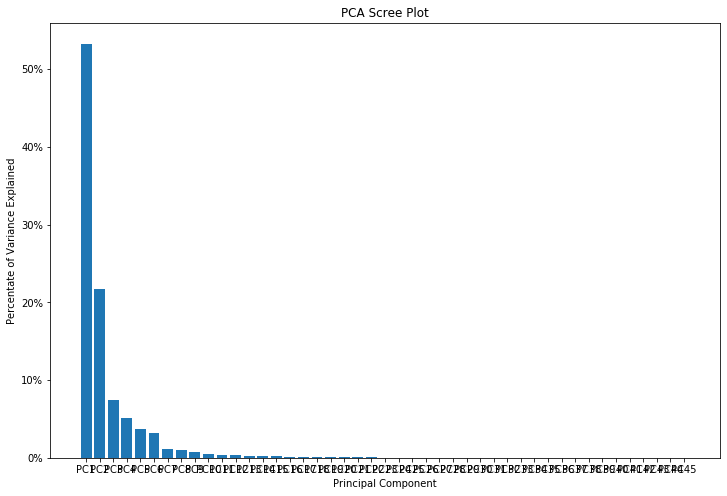

In [9]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = list(map(lambda x: 'PC'+str(x), range(1,46)))
plt.figure(figsize = (12, 8))
plt.bar(x= range(1,46), height=percent_variance, tick_label=columns)
ax = plt.gca()
var = ax.get_yticks()
var = [str(int(i))+'%' for i in var]
ax.set_yticklabels(var)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

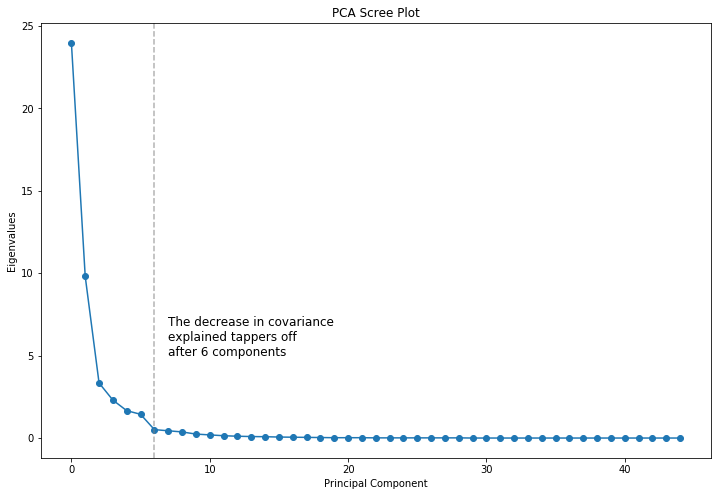

In [10]:
percent_variance = np.round(pca.explained_variance_, decimals =2)
columns = list(map(lambda x: 'PC'+str(x), range(1,46)))
plt.figure(figsize = (12, 8))
plt.plot(percent_variance, marker = 'o')
plt.axvline(x = 6, color = 'grey', linestyle = '--', alpha = 0.6)
plt.text(x=7, y = 5, s = 'The decrease in covariance\nexplained tappers off \nafter 6 components', fontsize = 12)
plt.ylabel('Eigenvalues')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

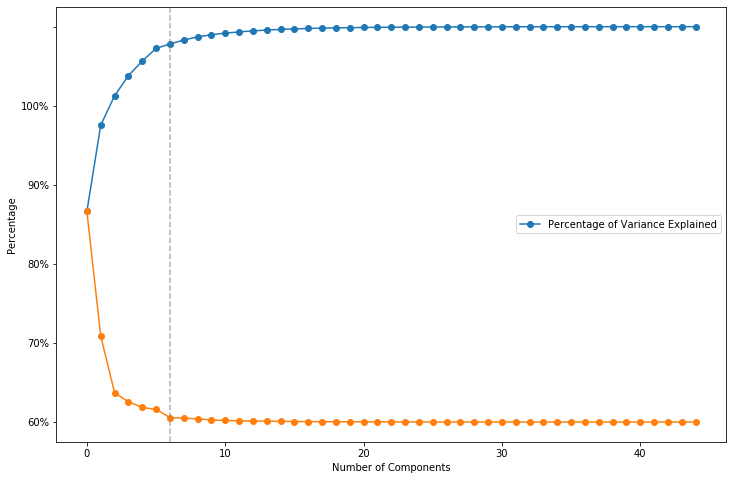

In [33]:
plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100, marker = 'o', label = 'Percentage of Variance Explained')
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = list(map(lambda x: 'PC'+str(x), range(1,46)))
plt.plot(percent_variance, marker = 'o', label = '')
ax = plt.gca()
var = ax.get_yticks()
var = [str(int(i))+'%' for i in var]
ax.set_yticklabels(var)
ax = plt.gca()
var = ax.get_yticks()
var = [str(i)+'%' for i in range(50,101,10)]
ax.set_yticklabels(var)
plt.axvline(x = 6, color = 'grey', linestyle = '--', alpha = 0.6)
plt.xlabel('Number of Components')
plt.ylabel('Percentage')
plt.legend()
plt.show()

In [11]:
ss = StandardScaler()
data_pca = ss.fit_transform(data_pca)

In [12]:
data['pca_score'] = np.sum(np.power(data_pca, 2), axis = 1)

In [49]:
df_pca = pd.DataFrame(data_pca).rename(columns = {0:'PC1', 1:'PC2', 2:'PC3', 3:'PC4', 4:'PC5', 5:'PC6'})

In [50]:
df_pca['RECORD'] = RECORD

In [51]:
df_pca['pca_score'] = data['pca_score']

In [52]:
df_pca = df_pca.sort_values(by = 'pca_score', ascending=False).reset_index().drop(columns = ['index']).reset_index().rename(columns = {'index': 'rank'})

In [53]:
df_pca.head()

,rank,PC1,PC2,PC3,PC4,PC5,PC6,RECORD,pca_score
0,0,601.578222,-440.186353,566.626948,-340.071738,-202.831343,-100.970263,632816,1.043711e+06
1,1,575.625272,459.328369,-448.479805,-268.876387,-45.236218,-224.125192,565392,8.680341e+05
2,2,126.425184,599.522993,511.124692,204.976654,32.430994,210.339326,1067360,7.239694e+05
3,3,215.372017,-44.179325,-216.882532,-54.940762,-212.376922,625.613352,917942,5.348895e+05
4,4,160.003935,-71.838532,-151.504069,399.222301,-354.090981,55.024334,585118,3.415021e+05


In [54]:
df_pca.sort_values(by = 'pca_score', ascending=False).head(10).to_csv('Data\pca_rank.csv', index = False)

In [13]:
data['RECORD'] = RECORD

In [14]:
data.head()

,FV/LotArea_Zip5,FV/BldArea_Zip5,FV/BldVol_Zip5,AVL/LotArea_Zip5,AVL/BldArea_Zip5,AVL/BldVol_Zip5,AVT/LotArea_Zip5,AVT/BldArea_Zip5,AVT/BldVol_Zip5,FV/LotArea_Zip3,FV/BldArea_Zip3,FV/BldVol_Zip3,AVL/LotArea_Zip3,AVL/BldArea_Zip3,AVL/BldVol_Zip3,AVT/LotArea_Zip3,AVT/BldArea_Zip3,AVT/BldVol_Zip3,FV/LotArea_Boro,FV/BldArea_Boro,FV/BldVol_Boro,AVL/LotArea_Boro,AVL/BldArea_Boro,AVL/BldVol_Boro,AVT/LotArea_Boro,AVT/BldArea_Boro,AVT/BldVol_Boro,FV/LotArea_tax,FV/BldArea_tax,FV/BldVol_tax,AVL/LotArea_tax,AVL/BldArea_tax,AVL/BldVol_tax,AVT/LotArea_tax,AVT/BldArea_tax,AVT/BldVol_tax,FV/LotArea,FV/BldArea,FV/BldVol,AVL/LotArea,AVL/BldArea,AVL/BldVol,AVT/LotArea,AVT/BldArea,AVT/BldVol,pca_score,RECORD
0,-0.223270,0.062910,-0.027061,-0.068649,0.018660,-0.026038,-0.092380,0.037145,-0.012569,-0.133713,0.014156,-0.021329,-0.034928,0.012848,-0.002502,-0.073700,0.018156,0.003536,-0.132265,0.015071,-0.019376,-0.034788,0.012645,-0.001785,-0.073914,0.017854,0.004438,-0.148266,-0.002232,-0.008363,-0.106864,-0.005948,-0.005931,-0.124603,-0.004145,-0.008495,-0.160450,0.011333,-0.041557,-0.013114,0.032995,0.000575,-0.031650,0.061926,0.008842,0.029225,1
1,25.744006,1.474659,0.498457,4.389035,0.175007,0.009973,11.814448,0.777774,0.281572,13.509351,0.763449,0.333716,3.077904,0.076133,0.021798,13.728172,0.313364,0.172571,13.770524,0.720969,0.336354,3.219611,0.072505,0.021770,14.330333,0.299387,0.177497,26.294119,0.314813,0.021485,7.962472,0.019552,-0.002845,22.090149,0.286127,0.020116,32.370894,0.657342,0.149074,14.678657,0.142083,0.028595,65.033747,0.705361,0.209202,563.843045,2
2,-0.057665,-0.044878,-0.033706,0.087617,0.000736,-0.015552,-0.016444,-0.019402,-0.016289,-0.046705,-0.043053,-0.025819,0.074195,0.005593,0.004573,0.014320,-0.004384,0.001399,-0.043601,-0.038825,-0.023875,0.079297,0.005782,0.005074,0.017948,-0.003642,0.002250,0.020369,-0.026439,-0.008741,0.176011,-0.008872,-0.005032,0.017070,-0.026307,-0.008857,0.047017,-0.037991,-0.043967,0.501915,0.020488,0.008734,0.383300,0.012799,0.006309,0.044974,3
3,-0.186684,0.103320,0.188669,-0.021784,0.112037,0.086960,-0.075604,0.058345,0.108178,-0.114491,0.035603,0.124420,-0.002201,0.050645,0.073748,-0.054255,0.026606,0.072926,-0.112677,0.035277,0.126654,-0.000572,0.048396,0.072127,-0.053620,0.025912,0.075480,-0.111011,0.006843,0.003890,-0.022027,0.009282,0.003752,-0.093305,0.004164,0.003250,-0.114616,0.029824,0.036699,0.141348,0.098147,0.088499,0.060021,0.080344,0.091092,0.044075,4
4,0.247694,13.717502,35.944431,0.436719,11.593015,18.725809,0.123573,7.200589,20.121279,0.113729,7.261407,24.281395,0.317975,4.697873,12.651014,0.176622,2.873440,11.573940,0.119888,6.842591,24.330185,0.334164,4.444124,12.263723,0.187333,2.740873,11.850230,0.331315,3.064268,2.034736,0.807957,1.881827,1.600981,0.278302,2.803397,1.949880,0.429565,6.259609,13.007068,1.652495,8.108790,14.591445,1.148429,6.285300,13.723383,1021.758992,5


In [15]:
data.sort_values(by = 'pca_score', ascending=False).head(20)

,FV/LotArea_Zip5,FV/BldArea_Zip5,FV/BldVol_Zip5,AVL/LotArea_Zip5,AVL/BldArea_Zip5,AVL/BldVol_Zip5,AVT/LotArea_Zip5,AVT/BldArea_Zip5,AVT/BldVol_Zip5,FV/LotArea_Zip3,FV/BldArea_Zip3,FV/BldVol_Zip3,AVL/LotArea_Zip3,AVL/BldArea_Zip3,AVL/BldVol_Zip3,AVT/LotArea_Zip3,AVT/BldArea_Zip3,AVT/BldVol_Zip3,FV/LotArea_Boro,FV/BldArea_Boro,FV/BldVol_Boro,AVL/LotArea_Boro,AVL/BldArea_Boro,AVL/BldVol_Boro,AVT/LotArea_Boro,AVT/BldArea_Boro,AVT/BldVol_Boro,FV/LotArea_tax,FV/BldArea_tax,FV/BldVol_tax,AVL/LotArea_tax,AVL/BldArea_tax,AVL/BldVol_tax,AVT/LotArea_tax,AVT/BldArea_tax,AVT/BldVol_tax,FV/LotArea,FV/BldArea,FV/BldVol,AVL/LotArea,AVL/BldArea,AVL/BldVol,AVT/LotArea,AVT/BldArea,AVT/BldVol,pca_score,RECORD
632815,-0.016208,402.699142,508.777541,0.909216,408.985473,382.435883,0.407472,417.420263,429.313012,0.000747,358.416929,559.864129,0.525563,446.508369,623.489505,0.439151,396.903758,622.695194,0.022848,329.372723,578.837320,0.594850,384.246453,709.569076,0.518264,321.385809,685.323231,0.247306,839.951266,1026.934355,1.158408,987.902015,1031.124912,0.207821,811.446693,1025.059314,-0.014365,345.379616,713.504539,0.449239,448.749906,806.872135,0.260532,344.053749,749.969660,1.043711e+06,632816
565391,412.780855,353.515986,262.583908,825.268603,431.398638,352.287966,817.158071,447.659828,370.937663,210.260956,378.920653,341.755122,924.343508,684.338262,602.027554,765.033725,505.270673,509.380137,208.669596,348.665283,332.011329,930.778852,622.786533,553.272408,773.040334,467.236179,497.724980,261.217809,169.674683,55.910682,486.975052,104.995396,44.471164,219.454035,155.343950,53.591663,321.391102,345.743604,357.095593,886.812735,449.222754,403.855579,643.098227,344.416287,375.371935,8.680341e+05,565392
1067359,659.019047,-0.077371,-0.061033,217.737928,-0.031534,-0.027334,274.636106,-0.035883,-0.031222,928.936439,-0.002179,-0.006647,255.356913,-0.005704,-0.006414,484.333016,-0.006003,-0.007006,921.860326,-0.002005,-0.006458,257.113640,-0.005190,-0.005894,489.311552,-0.005550,-0.006844,651.885713,-0.011190,-0.002960,659.036585,-0.000457,-0.000112,777.079072,0.000188,0.000277,785.039295,-0.008014,-0.002381,165.720979,-0.006663,-0.005726,209.297045,-0.009864,-0.007222,7.239694e+05,1067360
917941,1.583793,31.290685,15.899593,69.544742,269.959907,212.625876,129.404622,336.147537,280.152673,0.677123,20.328958,11.351615,31.947453,349.537358,209.956304,89.529699,645.280462,427.589642,0.516473,17.450071,10.200044,26.387185,217.691638,133.994022,65.429616,474.135367,337.001047,0.402071,8.975825,1.968801,11.411621,59.415911,16.774750,13.401052,228.950343,52.652026,0.516615,18.304949,12.585959,20.958493,254.236319,152.370286,39.584011,507.576849,368.791634,5.348895e+05,917942
585117,-0.190415,198.238771,63.271663,0.047380,137.362102,67.312792,-0.054713,103.510563,43.911191,-0.129984,309.129558,41.349578,0.019645,161.710022,48.158580,-0.042271,132.889317,35.462943,-0.123591,387.098731,33.953313,0.048546,451.577004,41.684084,-0.001795,377.702618,40.254299,-0.157560,199.202743,6.553178,-0.091514,123.265898,5.214471,-0.132412,182.378434,6.280948,-0.171885,405.909734,41.864919,0.014835,527.382919,47.402178,-0.054521,404.342625,44.053950,3.415021e+05,585118
85885,-0.115356,278.903218,474.223076,0.092641,229.544972,267.139781,-0.005285,193.905315,298.535864,-0.103734,149.949194,497.560282,0.019157,97.031266,260.824992,-0.043372,59.089826,236.899622,-0.101715,141.266492,498.521186,0.021757,91.780576,252.827670,-0.042262,56.353156,242.538899,-0.090161,63.439190,41.822691,0.033338,39.086474,33.117423,-0.075789,58.079797,40.087882,-0.088965,129.279048,267.120078,0.242152,167.268147,300.762846,0.111325,128.814447,280.804658,2.893111e+05,85886
585438,0.275043,213.711010,136.520941,0.080711,22.299961,21.866403,0.324303,111.589105,94.729645,0.015420,333.249144,89.225650,0.036146,26.287448,15.655497,0.307449,143.256697,76.478579,0.060293,417.299755,73.277080,0.072528,73.429535,13.550298,0.651247,407.166379,86.808318,0.003216,214.744657,14.142659,-0.081040,20.032800,1.6911

In [16]:
data.sort_values(by = 'pca_score', ascending=False).tail(10)

,FV/LotArea_Zip5,FV/BldArea_Zip5,FV/BldVol_Zip5,AVL/LotArea_Zip5,AVL/BldArea_Zip5,AVL/BldVol_Zip5,AVT/LotArea_Zip5,AVT/BldArea_Zip5,AVT/BldVol_Zip5,FV/LotArea_Zip3,FV/BldArea_Zip3,FV/BldVol_Zip3,AVL/LotArea_Zip3,AVL/BldArea_Zip3,AVL/BldVol_Zip3,AVT/LotArea_Zip3,AVT/BldArea_Zip3,AVT/BldVol_Zip3,FV/LotArea_Boro,FV/BldArea_Boro,FV/BldVol_Boro,AVL/LotArea_Boro,AVL/BldArea_Boro,AVL/BldVol_Boro,AVT/LotArea_Boro,AVT/BldArea_Boro,AVT/BldVol_Boro,FV/LotArea_tax,FV/BldArea_tax,FV/BldVol_tax,AVL/LotArea_tax,AVL/BldArea_tax,AVL/BldVol_tax,AVT/LotArea_tax,AVT/BldArea_tax,AVT/BldVol_tax,FV/LotArea,FV/BldArea,FV/BldVol,AVL/LotArea,AVL/BldArea,AVL/BldVol,AVT/LotArea,AVT/BldArea,AVT/BldVol,pca_score,RECORD
1039259,0.026612,0.013067,-0.000347,0.012447,-0.002379,-0.011011,0.019156,0.002059,-0.008086,0.031795,-0.000161,-0.005101,0.006147,-0.005330,-0.006121,0.004693,-0.005675,-0.006731,0.031552,-0.000148,-0.004956,0.006189,-0.004850,-0.005624,0.004741,-0.005246,-0.006576,-0.052034,-0.010391,-0.002721,-0.000967,0.000302,0.000221,0.001091,0.001250,0.000601,-0.045378,-0.006413,-0.000727,-0.026563,-0.006380,-0.005471,-0.067583,-0.009651,-0.006991,0.000046,1039260
1039260,0.026612,0.013067,-0.000347,0.012447,-0.002379,-0.011011,0.019156,0.002059,-0.008086,0.031795,-0.000161,-0.005101,0.006147,-0.005330,-0.006121,0.004693,-0.005675,-0.006731,0.031552,-0.000148,-0.004956,0.006189,-0.004850,-0.005624,0.004741,-0.005246,-0.006576,-0.052034,-0.010391,-0.002721,-0.000967,0.000302,0.000221,0.001091,0.001250,0.000601,-0.045378,-0.006413,-0.000727,-0.026563,-0.006380,-0.005471,-0.067583,-0.009651,-0.006991,0.000046,1039261
1039359,0.029159,0.009065,-0.003282,0.014093,-0.003448,-0.011735,0.020296,0.000245,-0.009395,0.033443,-0.002672,-0.007026,0.007027,-0.005531,-0.006278,0.005553,-0.006083,-0.007073,0.033189,-0.002459,-0.006825,0.007075,-0.005032,-0.005769,0.005610,-0.005624,-0.006910,-0.050877,-0.011386,-0.003019,0.001305,-0.000106,0.000042,0.002471,-0.000072,0.000197,-0.043984,-0.008406,-0.002785,-0.025992,-0.006532,-0.005608,-0.067212,-0.009916,-0.007279,0.000046,1039360
1039358,0.029159,0.009065,-0.003282,0.014093,-0.003448,-0.011735,0.020296,0.000245,-0.009395,0.033443,-0.002672,-0.007026,0.007027,-0.005531,-0.006278,0.005553,-0.006083,-0.007073,0.033189,-0.002459,-0.006825,0.007075,-0.005032,-0.005769,0.005610,-0.005624,-0.006910,-0.050877,-0.011386,-0.003019,0.001305,-0.000106,0.000042,0.002471,-0.000072,0.000197,-0.043984,-0.008406,-0.002785,-0.025992,-0.006532,-0.005608,-0.067212,-0.009916,-0.007279,0.000046,1039359
1039361,0.029159,0.009065,-0.003282,0.014093,-0.003448,-0.011735,0.020296,0.000245,-0.009395,0.033443,-0.002672,-0.007026,0.007027,-0.005531,-0.006278,0.005553,-0.006083,-0.007073,0.033189,-0.002459,-0.006825,0.007075,-0.005032,-0.005769,0.005610,-0.005624,-0.006910,-0.050877,-0.011386,-0.003019,0.001305,-0.000106,0.000042,0.002471,-0.000072,0.000197,-0.043984,-0.008406,-0.002785,-0.025992,-0.006532,-0.005608,-0.067212,-0.009916,-0.007279,0.000046,1039362
1039362,0.029159,0.009065,-0.003282,0.014093,-0.003448,-0.011735,0.020296,0.000245,-0.009395,0.033443,-0.002672,-0.007026,0.007027,-0.005531,-0.006278,0.005553,-0.006083,-0.007073,0.033189,-0.002459,-0.006825,0.007075,-0.005032,-0.005769,0.005610,-0.005624,-0.006910,-0.050877,-0.011386,-0.003019,0.001305,-0.000106,0.000042,0.002471,-0.000072,0.000197,-0.043984,-0.008406,-0.002785,-0.025992,-0.006532,-0.005608,-0.067212,-0.009916,-0.007279,0.000046,1039363
1039357,0.029159,0.009065,-0.003282,0.014093,-0.003448,-0.011735,0.020296,0.000245,-0.009395,0.033443,-0.002672,-0.007026,0.007027,-0.005531,-0.006278,0.005553,-0.006083,-0.007073,0.033189,-0.002459,-0.006825,0.007075,-0.005032,-0.005769,0.005610,-0.005624,-0.006910,-0.050877,-0.011386,-0.003019,0.001305,-0.000106,0.000042,0.002471,-0.000072,0.000197,-0.043984,-0.008406,-0.002785,-0.025992,-0.006532,-0.005608,-0.067212,-0.009916,-0.007279,0.000046,1039358
1038836,0.054072,0.010124,-0.004691,0.022668,-0.002753,-0.009847,0.025351,0.000925,

In [17]:
data[data['pca_score'] > 100].shape

(547, 47)

In [18]:
data['pca_score'].describe()

count    1.070994e+06
mean     6.000000e+00
std      1.683764e+03
min      3.176548e-05
25%      3.860757e-03
50%      1.064794e-02
75%      3.887199e-02
max      1.043711e+06
Name: pca_score, dtype: float64

In [19]:
data = data[['RECORD', 'pca_score']]

In [20]:
%%time
data.to_csv('Data/pca_output.csv', index = False)

Wall time: 12.1 s
